In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('path_prediction.csv')
print(dataset.head())

   icao24 callsign origin_country        time_position   longitude   latitude  \
0  s9t0u1   QTR321             UK  2025-07-30 10:00:00 -119.859959  71.429228   
1  j0k1l2   AAL789         Canada  2025-07-30 10:00:10  177.419097 -80.521963   
2  m3n4o5   DAL456            USA  2025-07-30 10:00:20   22.684660 -64.493309   
3  s9t0u1   AFR987             UK  2025-07-30 10:00:30  -51.616152  17.684783   
4  g7h8i9   UAL123             UK  2025-07-30 10:00:40  -76.247030  21.443679   

   baro_altitude    velocity     heading  vertical_rate  on_ground  \
0   14958.846358  429.815012   79.315873     -31.816979      False   
1   37446.471265  487.548982  291.652021     -33.884497      False   
2   23222.374222  206.554212  299.188774     -11.563410      False   
3   11546.412210  236.537147   19.585006     -13.821284       True   
4   39277.957489  200.790543  256.299881      36.695787      False   

  origin_airport destination_airport aircraft_type  position_source  \
0            CDG     

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [ ]:
print(dataset.shape)

(5000, 18)


In [ ]:
print(dataset.tail(10))

      icao24 callsign origin_country        time_position   longitude  \
4990  s9t0u1   DAL456        Germany  2025-07-30 23:51:40   58.219442   
4991  a1b2c3   AAL789          India  2025-07-30 23:51:50  139.184154   
4992  g7h8i9   SWA321        Germany  2025-07-30 23:52:00   78.224645   
4993  j0k1l2   AAL789         Canada  2025-07-30 23:52:10 -132.736726   
4994  j0k1l2   BAW654          India  2025-07-30 23:52:20  158.609353   
4995  m3n4o5   AAL789          India  2025-07-30 23:52:30  143.961499   
4996  p6q7r8   BAW654         France  2025-07-30 23:52:40  -54.692612   
4997  g7h8i9   DAL456            UAE  2025-07-30 23:52:50 -139.847997   
4998  g7h8i9   AAL789            USA  2025-07-30 23:53:00   73.495710   
4999  a1b2c3   DAL456          India  2025-07-30 23:53:10   82.210069   

       latitude  baro_altitude    velocity     heading  vertical_rate  \
4990  37.322093   16262.946166  309.346000  190.034888     -44.050451   
4991 -41.060836   25031.645421  145.961269   95.57

In [ ]:
print(dataset.describe())

         longitude     latitude  baro_altitude     velocity      heading  \
count  5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean      0.001271    -0.705672   20964.254120   353.481387   179.613239   
std     103.157972    51.706724   11600.506224   144.663826   103.541962   
min    -179.957288   -89.968407     900.372769   100.010259     0.036854   
25%     -87.551104   -45.683925   10928.442561   229.424292    91.783268   
50%       0.670579    -1.088322   20809.690399   355.932718   180.625010   
75%      87.635421    42.921533   31094.924612   478.484393   268.614279   
max     179.881072    89.980680   40980.677070   599.945531   359.990592   

       vertical_rate  distance_to_nearest_aircraft  
count    5000.000000                   5000.000000  
mean       -0.528388                     25.240586  
std        28.728559                     14.399390  
min       -49.960914                      0.100421  
25%       -25.301361                     13.015533

In [ ]:
dataset.columns = (
    dataset.columns.str.strip()             
              .str.lower()              
              .str.replace(" ", "_")    
)


In [ ]:
dataset.replace("None", np.nan, inplace=True)

In [ ]:
print("\nMissing values per column:")
print(dataset.isna().sum())


Missing values per column:
icao24                             0
callsign                           0
origin_country                     0
time_position                      0
longitude                          0
latitude                           0
baro_altitude                      0
velocity                           0
heading                            0
vertical_rate                      0
on_ground                          0
origin_airport                     0
destination_airport                0
aircraft_type                      0
position_source                    0
distance_to_nearest_aircraft       0
airspace_class                     0
alert_level                     4300
dtype: int64


In [ ]:
print(dataset["alert_level"].unique())
print(dataset["alert_level"].value_counts(dropna=False))


[nan 'Advisory' 'Warning' 'Critical']
alert_level
NaN         4300
Advisory     486
Warning      161
Critical      53
Name: count, dtype: int64


In [ ]:
dataset["alert_level"] = dataset["alert_level"].fillna("No Alert")

dataset["alert_level"] = dataset["alert_level"].astype("category")

In [ ]:
print("\nMissing values per column:")
print(dataset.isna().sum())


Missing values per column:
icao24                          0
callsign                        0
origin_country                  0
time_position                   0
longitude                       0
latitude                        0
baro_altitude                   0
velocity                        0
heading                         0
vertical_rate                   0
on_ground                       0
origin_airport                  0
destination_airport             0
aircraft_type                   0
position_source                 0
distance_to_nearest_aircraft    0
airspace_class                  0
alert_level                     0
dtype: int64


In [ ]:
import numpy as np

invalid_lat = dataset[~dataset["latitude"].between(-90, 90)]
invalid_lon = dataset[~dataset["longitude"].between(-180, 180)]
invalid_heading = dataset[~dataset["heading"].between(0, 360)]
invalid_velocity = dataset[dataset["velocity"] > 360]
invalid_altitude = dataset[(dataset["baro_altitude"] < 0) & (dataset["on_ground"] == False)]

print("Invalid Latitude Rows:", len(invalid_lat))
print("Invalid Longitude Rows:", len(invalid_lon))
print("Invalid Heading Rows:", len(invalid_heading))
print("Invalid Velocity Rows:", len(invalid_velocity))
print("Invalid Altitude Rows:", len(invalid_altitude))

numeric_cols = ["baro_altitude", "velocity", "heading", "vertical_rate", "distance_to_nearest_aircraft"]

for col in numeric_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower) | (dataset[col] > upper)]
    print(f"{col}: {len(outliers)} outliers detected")

invalid_icao24 = dataset[~dataset["icao24"].str.match(r"^[a-zA-Z0-9]{6}$")]
print("Invalid ICAO24 Rows:", len(invalid_icao24))

valid_airspace = set(list("ABCDEFG") + ["Unknown"])
invalid_airspace = dataset[~dataset["airspace_class"].isin(valid_airspace)]
print("Invalid Airspace Class Rows:", len(invalid_airspace))


Invalid Latitude Rows: 0
Invalid Longitude Rows: 0
Invalid Heading Rows: 0
Invalid Velocity Rows: 2462
Invalid Altitude Rows: 0
baro_altitude: 0 outliers detected
velocity: 0 outliers detected
heading: 0 outliers detected
vertical_rate: 0 outliers detected
distance_to_nearest_aircraft: 0 outliers detected
Invalid ICAO24 Rows: 0
Invalid Airspace Class Rows: 0


In [ ]:
import numpy as np
import pandas as pd

numeric_cols = dataset.select_dtypes(include=[np.number]).columns

Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

non_outliers_mask = ~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) | (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

dataset_clean = dataset[non_outliers_mask]

print(f"Original dataset size: {dataset.shape}")
print(f"Cleaned dataset size: {dataset_clean.shape}")


Original dataset size: (5000, 18)
Cleaned dataset size: (5000, 18)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

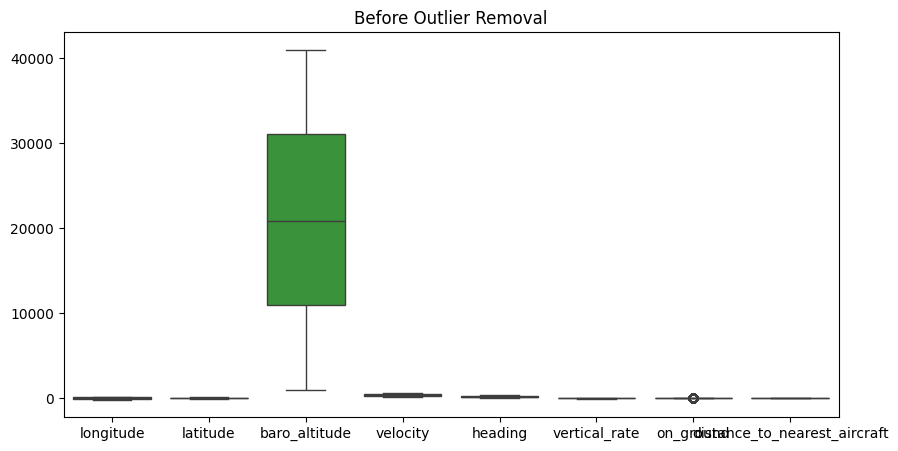

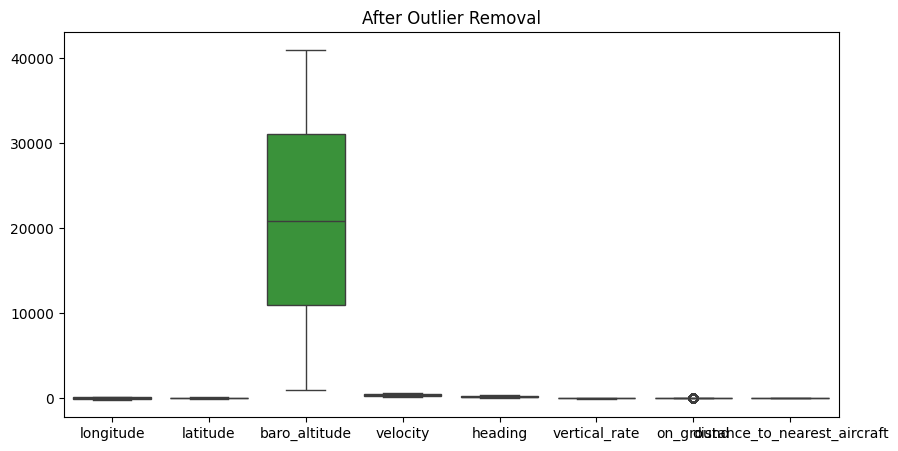

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dataset)
plt.title("Before Outlier Removal")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=dataset_clean)
plt.title("After Outlier Removal")
plt.show()

In [ ]:
non_numeric_cols = dataset.select_dtypes(exclude=["number"]).columns

for col in non_numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values count: {dataset[col].nunique()}")
    print("Unique values:", dataset[col].unique())


Column: icao24
Unique values count: 7
Unique values: ['s9t0u1' 'j0k1l2' 'm3n4o5' 'g7h8i9' 'd4e5f6' 'p6q7r8' 'a1b2c3']

Column: callsign
Unique values count: 7
Unique values: ['QTR321' 'AAL789' 'DAL456' 'AFR987' 'UAL123' 'BAW654' 'SWA321']

Column: origin_country
Unique values count: 7
Unique values: ['UK' 'Canada' 'USA' 'France' 'Germany' 'India' 'UAE']

Column: time_position
Unique values count: 5000
Unique values: ['2025-07-30 10:00:00' '2025-07-30 10:00:10' '2025-07-30 10:00:20' ...
 '2025-07-30 23:52:50' '2025-07-30 23:53:00' '2025-07-30 23:53:10']

Column: on_ground
Unique values count: 2
Unique values: [False  True]

Column: origin_airport
Unique values count: 8
Unique values: ['CDG' 'ORD' 'KSFO' 'IAH' 'DEL' 'EGLL' 'DXB' 'JFK']

Column: destination_airport
Unique values count: 8
Unique values: ['HND' 'LAX' 'LHR' 'YYZ' 'BOM' 'ATL' 'FRA' 'DFW']

Column: aircraft_type
Unique values count: 7
Unique values: ['B777' 'B737' 'Gulfstream' 'A350' 'Embraer190' 'Cessna172' 'A320']

Column: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

dataset = dataset.drop(columns=["time_position"], errors="ignore")

X = dataset.drop(columns=["alert_level"])
y = dataset["alert_level"]

bool_cols = X.select_dtypes(include=["bool"]).columns
for col in bool_cols:
    X[col] = X[col].astype(int)
    print(f"Boolean column '{col}' converted to integers: {X[col].unique()}")

categorical_cols = X.select_dtypes(include=["object", "category"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"Label encoding for '{col}':")
    for class_, val in zip(le.classes_, range(len(le.classes_))):
        print(f"  {class_} -> {val}")

target_le = LabelEncoder()
y = target_le.fit_transform(y.astype(str))
print("Label encoding for target 'alert_level':")
for class_, val in zip(target_le.classes_, range(len(target_le.classes_))):
    print(f"  {class_} -> {val}")


Boolean column 'on_ground' converted to integers: [0 1]
Label encoding for 'icao24':
  a1b2c3 -> 0
  d4e5f6 -> 1
  g7h8i9 -> 2
  j0k1l2 -> 3
  m3n4o5 -> 4
  p6q7r8 -> 5
  s9t0u1 -> 6
Label encoding for 'callsign':
  AAL789 -> 0
  AFR987 -> 1
  BAW654 -> 2
  DAL456 -> 3
  QTR321 -> 4
  SWA321 -> 5
  UAL123 -> 6
Label encoding for 'origin_country':
  Canada -> 0
  France -> 1
  Germany -> 2
  India -> 3
  UAE -> 4
  UK -> 5
  USA -> 6
Label encoding for 'origin_airport':
  CDG -> 0
  DEL -> 1
  DXB -> 2
  EGLL -> 3
  IAH -> 4
  JFK -> 5
  KSFO -> 6
  ORD -> 7
Label encoding for 'destination_airport':
  ATL -> 0
  BOM -> 1
  DFW -> 2
  FRA -> 3
  HND -> 4
  LAX -> 5
  LHR -> 6
  YYZ -> 7
Label encoding for 'aircraft_type':
  A320 -> 0
  A350 -> 1
  B737 -> 2
  B777 -> 3
  Cessna172 -> 4
  Embraer190 -> 5
  Gulfstream -> 6
Label encoding for 'position_source':
  ADS-B -> 0
  Multilateration -> 1
  Radar -> 2
Label encoding for 'airspace_class':
  A -> 0
  B -> 1
  C -> 2
  D -> 3
  E -> 4


In [ ]:
encoded_dataset = X.copy()
encoded_dataset["alert_level"] = y

print(encoded_dataset.head())

   icao24  callsign  origin_country   longitude   latitude  baro_altitude  \
0       6         4               5 -119.859959  71.429228   14958.846358   
1       3         0               0  177.419097 -80.521963   37446.471265   
2       4         3               6   22.684660 -64.493309   23222.374222   
3       6         1               5  -51.616152  17.684783   11546.412210   
4       2         6               5  -76.247030  21.443679   39277.957489   

     velocity     heading  vertical_rate  on_ground  origin_airport  \
0  429.815012   79.315873     -31.816979          0               0   
1  487.548982  291.652021     -33.884497          0               7   
2  206.554212  299.188774     -11.563410          0               6   
3  236.537147   19.585006     -13.821284          1               4   
4  200.790543  256.299881      36.695787          0               7   

   destination_airport  aircraft_type  position_source  \
0                    4              3               

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8730
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.00      0.00      0.00        14
           2       0.87      1.00      0.93       873
           3       0.00      0.00      0.00        23

    accuracy                           0.87      1000
   macro avg       0.22      0.25      0.23      1000
weighted avg       0.76      0.87      0.81      1000



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metr